# Aggregate Statistics

In this notebook, we take the GDELT dataset and filter out important statistics by subdistrict and month. The file is on the shared Google Drive folder at the path 

"2) Data and Resources/2) Data/Joker/03.events/events_sbd.csv"

## Data Aggregation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# load data
# local path
path = '../../../data/events/events_sbd.csv'
data = pd.read_csv(path)

In [3]:
# add month key (because we group by this later on)
dates = data.SQLDATE
months = [int(str(m)[:-2]) for m in dates]
data['YearMonth'] = months

In [4]:
# data with all columns
data.head()

GLOBALEVENTID  IsRootEvent   SQLDATE  QuadClass  GoldsteinScale  \
0      747034819            0  20180412          3            -2.0   
1      842981814            0  20190504          2             7.4   
2      868443165            0  20190826          2             7.4   
3      623221009            0  20170201          3            -5.0   
4      620791752            1  20170126          4            -7.0   

   NumMentions  NumSources  NumArticles   AvgTone  ActionGeo_Long  \
0            2           1            2 -5.746141         37.1586   
1            2           1            2 -7.515152         38.0000   
2            2           1            2 -3.951562         35.8072   
3            6           1            6 -4.687500         36.9096   
4            6           1            6 -0.951087         38.0000   

   ActionGeo_Lat                                          SOURCEURL     q_sbd  \
0        36.2028  http://www.biobiochile.cl/noticias/internacion...  SY020000   
1        35.0000  https://thearabweekly.com/turkey-uae-tensions-...  SY050304   
2        32.9049  https://21stcenturywire.com/2019/08/26/tulsi-g...  SY140200   
3        36.2761  http://m.washingtontimes.com/news/2017/feb/1/i...  SY020004   
4        35.0000  https://nsnbc.me/2016/11/10/trump-to-designate...  SY050304   

      q_d  YearMonth  
0  SY0200     201804  
1  SY0503     201905  
2  SY1402     201908  
3  SY0200     201702  
4  SY0503     201701

Explanation of statistis can be found at https://bigquery.cloud.google.com/table/gdelt-bq:gdeltv2.events?tab=schema

Summary: 

- IsRootEvent: can be used as a tag for importance of an event

- QuadClass: 

    1 = verbal cooperation
    
    2 = material cooperation
    
    3 = verbal conflict
    
    4 = material conflict

- GoldsteinScale: potential of the event to stabilize or destabilize a country, on a scale [-10,10]

- NumMentions, NumSources, NumArticles: can be used as a measure of importance

- AvgTone: can be used as a measure of impact


In [5]:
stats = ['IsRootEvent', 'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles', 'AvgTone']

## Compute statistics

Now we aggregate different statistics, grouped by subdistrict and month. The statistics are:

- Total number of events

- Percentages of events in different classes

- Total number of root events

- Percentage of root events in different classes

- Minima, Maxima, Mean and Median of

    - GoldsteinScale
    
    - NumMentions
    
    - NumSources
    
    - NumArticles
    
    - AvgTone
    
    - GoldsteinScale weighted by NumMentions

In each cell, we compute one (group of) statistics. The SQL-Type queries are taken from https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e

In [6]:
def perc10(x): return np.percentile(x, q=10)
def perc90(x): return np.percentile(x, q=90)

In [7]:
specifications = ['min', 'max', 'mean', 'median', perc10, perc90]
specifications_names = ['min', 'max', 'mean', 'median', 'perc10', 'perc90']

In [8]:
# total events per month
total_events = data.groupby(['q_sbd', 'YearMonth']).size().to_frame('size')

In [9]:
# percentage of events with QuadClasses
events_perc_QC1 = data[data.QuadClass==1].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / total_events
events_perc_QC2 = data[data.QuadClass==2].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / total_events
events_perc_QC3 = data[data.QuadClass==3].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / total_events
events_perc_QC4 = data[data.QuadClass==4].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / total_events

In [10]:
# number of root events
root_events = data[data.IsRootEvent==1].groupby(['q_sbd', 'YearMonth']).size().to_frame('size')

In [11]:
# percentage of root events with QuadClasses
root_perc_QC1 = data[(data.QuadClass==1) & (data.IsRootEvent == 1)].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / root_events
root_perc_QC2 = data[(data.QuadClass==2) & (data.IsRootEvent == 1)].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / root_events
root_perc_QC3 = data[(data.QuadClass==3) & (data.IsRootEvent == 1)].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / root_events
root_perc_QC4 = data[(data.QuadClass==4) & (data.IsRootEvent == 1)].groupby(['q_sbd', 'YearMonth']).size().to_frame('size') / root_events

In [12]:
# minimal, maximal, mean and median Goldstein Scale
goldstein = data.groupby(['q_sbd', 'YearMonth']).agg({'GoldsteinScale': specifications})['GoldsteinScale']

In [13]:
# minimal, maximal, mean and median NumMentions
nummentions = data.groupby(['q_sbd', 'YearMonth']).agg({'NumMentions': specifications})['NumMentions']

In [14]:
# minimal, maximal, mean and median NumSources
numsources = data.groupby(['q_sbd', 'YearMonth']).agg({'NumSources': specifications})['NumSources']

In [15]:
# minimal, maximal, mean and median NumArticles
numarticles = data.groupby(['q_sbd', 'YearMonth']).agg({'NumArticles': specifications})['NumArticles']

In [16]:
# minimal, maximal, mean and median Average Tone
avgtone = data.groupby(['q_sbd', 'YearMonth']).agg({'AvgTone': specifications})['AvgTone']

In [17]:
# minimal, maximal, mean and median Goldstein Scale weighted by number of mentions
data['GoldWeight'] = data.GoldsteinScale * data.NumMentions
goldweight = data.groupby(['q_sbd', 'YearMonth']).agg({'GoldWeight': specifications})['GoldWeight']

In [18]:
data['GoldAvg'] = data.GoldsteinScale * data.AvgTone
goldavg = data.groupby(['q_sbd', 'YearMonth']).agg({'GoldAvg': specifications})['GoldAvg']

In [19]:
data['AvgWeight'] = data.AvgTone * data.NumMentions
avgweight = data.groupby(['q_sbd', 'YearMonth']).agg({'AvgWeight': specifications})['AvgWeight']

## Group Statistics into table

In the dict `STATISTICS`, we enumerate all statistics that we look at as keys. The value is a list of the dataframe and a list of the statistics we considered.

The summary can be found in the DataFrame `assembled_data`.

In [20]:
STATISTICS = {'total_events': [total_events, ['size']], 
              'events_perc_QC1': [events_perc_QC1, ['size']], 
              'events_perc_QC2': [events_perc_QC2, ['size']],
              'events_perc_QC3': [events_perc_QC3, ['size']],
              'events_perc_QC4': [events_perc_QC4, ['size']],
              'root_events': [root_events, ['size']], 
              'root_perc_QC1': [root_perc_QC1, ['size']],
              'root_perc_QC2': [root_perc_QC2, ['size']],
              'root_perc_QC3': [root_perc_QC3, ['size']],
              'root_perc_QC4': [root_perc_QC4, ['size']],
              'goldstein': [goldstein, specifications],
              'nummentions': [nummentions, specifications],
              'numsources': [numsources, specifications],
              'numarticles': [numarticles, specifications],
              'avgtone': [avgtone, specifications],
              'goldweight': [goldweight, specifications],
              'goldavg': [goldavg, specifications],
              'avgweight': [avgweight, specifications]}

more statistics:

- quartiles / percentiles

- gemoetric mean



In [21]:
assembled_data = pd.DataFrame()
for stat in STATISTICS:
    if len(STATISTICS[stat][1]) == 1:
        for specification in STATISTICS[stat][1]:
            column_name = stat + '_' + str(specification)
            assembled_data[column_name] = STATISTICS[stat][0][str(specification)]
    else: 
        for specification in specifications_names:
            column_name = stat + '_' + str(specification)
            assembled_data[column_name] = STATISTICS[stat][0][str(specification)]

In [22]:
assembled_data = assembled_data.fillna(0)
assembled_data.head()

total_events_size  events_perc_QC1_size  \
q_sbd    YearMonth                                            
SY010000 201701                 38694              0.573267   
         201702                 27626              0.549193   
         201703                 34939              0.473511   
         201704                 59898              0.470400   
         201705                 27350              0.516527   

                    events_perc_QC2_size  events_perc_QC3_size  \
q_sbd    YearMonth                                               
SY010000 201701                 0.091513              0.136429   
         201702                 0.093282              0.141063   
         201703                 0.085549              0.149833   
         201704                 0.077565              0.213129   
         201705                 0.105411              0.140731   

                    events_perc_QC4_size  root_events_size  \
q_sbd    YearMonth                                           
SY010000 201701                 0.198791           21652.0   
         201702                 0.216463           15247.0   
         201703                 0.291107           19560.0   
         201704                 0.238906           25374.0   
         201705                 0.237331           15058.0   

                    root_perc_QC1_size  root_perc_QC2_size  \
q_sbd    YearMonth                                           
SY010000 201701               0.573989            0.088953   
         201702               0.534138            0.092215   
         201703               0.451585            0.082771   
         201704               0.444077            0.078624   
         201705               0.514411            0.108248   

                    root_perc_QC3_size  root_perc_QC4_size  ...  goldavg_mean  \
q_sbd    YearMonth                                          ...                 
SY010000 201701               0.126362            0.210696  ...      5.211509   
         201702               0.141274            0.232374  ...      7.393740   
         201703               0.151585            0.314059  ...     14.141685   
         201704               0.213841            0.263459  ...     10.280694   
         201705               0.126245            0.251096  ...      7.293915   

                    goldavg_median  goldavg_perc10  goldavg_perc90  \
q_sbd    YearMonth                                                   
SY010000 201701           0.000000      -23.529412       48.154028   
         201702           0.000000      -21.576820       52.023121   
         201703           0.964630      -21.782827       71.922572   
         201704           1.107139      -23.333333       57.044692   
         201705          -0.000000      -23.036942       50.847458   

                    avgweight_min  avgweight_max  avgweight_mean  \
q_sbd    YearMonth                                                 
SY010000 201701      -1050.595064     489.132857      -22.410845   
         201702      -1555.555556     394.031609      -22.608050   
         201703      -1767.487685     375.032962      -29.565261   
         201704      -1581.254398     371.556351      -24.790233   
         201705      -1070.169904     264.444444      -21.249941   

                    avgweight_median  avgweight_perc10  avgweight_perc90  
q_sbd    YearMonth                                                        
SY010000 201701           -11.489647        -57.521125          0.000000  
         201702           -11.502212        -60.185185          0.522193  
         201703           -15.384615        -75.226496         -0.938967  
         201704           -13.129363        -59.332244         -2.994903  
         201705           -11.228070        -55.201472          0.571923  

[5 rows x 58 columns]

## Crosscorrelation Matrix
Print and plot the crosscorrelation matrix

In [23]:
corr_mat = assembled_data.corr()

In [24]:
corr_mat

total_events_size  events_perc_QC1_size  \
total_events_size              1.000000              0.026267   
events_perc_QC1_size           0.026267              1.000000   
events_perc_QC2_size           0.000023             -0.245112   
events_perc_QC3_size           0.037238             -0.265306   
events_perc_QC4_size          -0.046486             -0.726284   
root_events_size               0.993039              0.026182   
root_perc_QC1_size             0.042517              0.655989   
root_perc_QC2_size             0.003361             -0.165668   
root_perc_QC3_size             0.039362             -0.183102   
root_perc_QC4_size            -0.027474             -0.521153   
goldstein_min                 -0.068471              0.450812   
goldstein_max                  0.127588              0.252325   
goldstein_mean                 0.039264              0.694059   
goldstein_median               0.057137              0.663962   
goldstein_perc10              -0.073684              0.534924   
goldstein_perc90               0.094261              0.389738   
nummentions_min               -0.059402              0.020012   
nummentions_max                0.617943              0.005182   
nummentions_mean               0.005299             -0.041435   
nummentions_median            -0.036286             -0.042292   
nummentions_perc10            -0.075643              0.006831   
nummentions_perc90             0.028662             -0.038333   
numsources_min                -0.003918              0.027266   
numsources_max                 0.639124              0.005646   
numsources_mean                0.057994             -0.019594   
numsources_median             -0.007853              0.010229   
numsources_perc10             -0.004808              0.027587   
numsources_perc90             -0.020170             -0.017878   
numarticles_min               -0.059920              0.017929   
numarticles_max                0.637224              0.005569   
numarticles_mean               0.004803             -0.038612   
numarticles_median            -0.036560             -0.041288   
numarticles_perc10            -0.076936              0.005574   
numarticles_perc90             0.038290             -0.037006   
avgtone_min                   -0.370058              0.223645   
avgtone_max                    0.354827              0.194027   
avgtone_mean                  -0.002622              0.414273   
avgtone_median                 0.002162              0.391661   
avgtone_perc10                -0.065726              0.353391   
avgtone_perc90                 0.063850              0.305410   
goldweight_min                -0.624464              0.077642   
goldweight_max                 0.692579              0.060106   
goldweight_mean                0.029944              0.577488   
goldweight_median              0.039816              0.564181   
goldweight_perc10             -0.019464              0.496079   
goldweight_perc90              0.060719              0.321832   
goldavg_min                   -0.359312             -0.089675   
goldavg_max                    0.342172             -0.299981   
goldavg_mean                  -0.040110             -0.585249   
goldavg_median                -0.056318             -0.566826   
goldavg_perc10                -0.067469             -0.268627   
goldavg_perc90                 0.019087             -0.499692   
avgweight_min                 -0.635022              0.041144   
avgweight_max                  0.659936              0.090058   
avgweight_mean                -0.008022              0.336173   
avgweight_median               0.028477              0.311894   
avgweight_perc10              -0.048479              0.268854   
avgweight_perc90               0.031797              0.237728   

                      events_perc_QC2_size  events_perc_QC3_size  \
total_events_size                 0.000023              0.037238   
events_perc_QC1_size             -0.245112        

<Figure size 432x288 with 0 Axes>

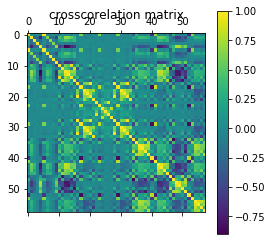

In [32]:
plt.figure()
plt.matshow(corr_mat)
plt.colorbar()
plt.title("crosscorelation matrix")
plt.show()

## Select important statistics 

Now we use the vif (https://en.wikipedia.org/wiki/Variance_inflation_factor) to filter out statistics that can be explained through other statistics. For our further analysis, we used limits on the vif of 10 and 100. 

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def reduce_entries(assembled_data, lim=10):
    done = False    
    curr_data = assembled_data
    
    while not done:
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(curr_data.values, i) for i in range(curr_data.shape[1])]
        vif["features"] = curr_data.columns

        curr_max = 0
        curr_ind = 0
        
        for i in range(vif.shape[0]):
            if vif['VIF Factor'].iloc[i] > curr_max:
                curr_max = vif['VIF Factor'].iloc[i]
                curr_ind = i
                
        if curr_max > lim:
            feature = vif['features'].iloc[curr_ind]
            curr_data = curr_data.drop(feature, axis=1)
            
        else: done = True
        
    return curr_data

In [27]:
curr_data = reduce_entries(assembled_data,lim=10)

In [28]:
curr_data

events_perc_QC2_size  events_perc_QC3_size  \
q_sbd    YearMonth                                               
SY010000 201701                 0.091513              0.136429   
         201702                 0.093282              0.141063   
         201703                 0.085549              0.149833   
         201704                 0.077565              0.213129   
         201705                 0.105411              0.140731   
         201706                 0.104764              0.163395   
         201707                 0.095334              0.132205   
         201708                 0.104442              0.124264   
         201709                 0.108646              0.139990   
         201710                 0.095386              0.149105   
         201711                 0.093632              0.129481   
         201712                 0.107169              0.148721   
         201801                 0.094508              0.176434   
         201802                 0.093597              0.188232   
         201803                 0.117986              0.166017   
         201804                 0.084143              0.213860   
         201805                 0.115051              0.154183   
         201806                 0.111988              0.158042   
         201807                 0.130549              0.127926   
         201808                 0.111064              0.136788   
         201809                 0.095340              0.170356   
         201810                 0.125921              0.135602   
         201811                 0.118357              0.145765   
         201812                 0.121991              0.138600   
         201901                 0.112214              0.132843   
         201902                 0.131859              0.132652   
         201903                 0.114257              0.138142   
         201904                 0.133178              0.119684   
         201905                 0.115201              0.151757   
         201906                 0.102770              0.139802   
...                                  ...                   ...   
SY140200 201901                 0.122137              0.126802   
         201902                 0.043956              0.179945   
         201903                 0.061844              0.236977   
         201904                 0.097927              0.222859   
         201905                 0.102941              0.159926   
         201906                 0.059474              0.100526   
         201907                 0.090741              0.114815   
         201908                 0.122605              0.164751   
         201909                 0.111717              0.173025   
         201910                 0.168317              0.118812   
SY140201 201701                 0.000000              0.090909   
         201703                 0.000000              0.500000   
         201706                 0.142857              0.000000   
         201707                 0.000000              0.000000   
         201709                 0.333333              0.666667   
         201710                 0.000000              0.000000   
         201711                 0.000000              0.000000   
         201803                 0.000000              0.000000   
         201804                 0.000000              1.000000   
         201805                 0.000000              0.000000   
         201808                 0.000000              0.500000   
         201809                 0.000000              0.000000   
         201810                 0.000000              0.000000   
         201902                 0.333333              0.000000   
         201903                 0.000000              1.000000   
         201905                 0.000000              0.000000   
         201906                 0.000000              0.235294   
         201907                 0.000000              0.0000

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(curr_data.values, i) for i in range(curr_data.shape[1])]
vif["features"] = curr_data.columns

In [30]:
# resulting featurs and vif
vif

VIF Factor              features
0     3.421252  events_perc_QC2_size
1     2.598699  events_perc_QC3_size
2     2.683141      root_events_size
3     3.961606    root_perc_QC1_size
4     2.815709    root_perc_QC2_size
5     2.436879    root_perc_QC3_size
6     4.814853    root_perc_QC4_size
7     9.966166         goldstein_min
8     6.875338      goldstein_median
9     9.439381      goldstein_perc90
10    2.620971       nummentions_min
11    4.723306        numsources_max
12    7.286839     numsources_perc90
13    7.990104       numarticles_max
14    6.110867           avgtone_max
15    7.401123        avgtone_perc90
16    5.357026        goldweight_min
17    5.093258        goldweight_max
18    5.578089     goldweight_median
19    8.699876     goldweight_perc10
20    5.514562     goldweight_perc90
21    8.486149           goldavg_min
22    6.833122        goldavg_median
23    7.146833        goldavg_perc10
24    9.950384        goldavg_perc90
25    5.705148         avgweight_min
26    3.437224         avgweight_max
27    7.399745      avgweight_median
28    8.853105      avgweight_perc10
29    5.358199      avgweight_perc90

In [31]:
# output table
curr_data.to_csv('../../../data/events/data_statistics.csv')